In [2]:
using PyCall
itikz=pyimport("itikz")
nM   =pyimport("itikz.nicematrix")
jinja=pyimport("jinja2");

# Example

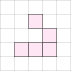

In [6]:
src=raw"\documentclass[tikz]{standalone}

       \begin{document}
       \begin{tikzpicture}[scale=0.5]
       \draw[help lines] grid (5, 5);
       \draw[fill=magenta!10] (1, 1) rectangle (2, 2);
       \draw[fill=magenta!10] (2, 1) rectangle (3, 2);
       \draw[fill=magenta!10] (3, 1) rectangle (4, 2);
       \draw[fill=magenta!10] (3, 2) rectangle (4, 3);
       \draw[fill=magenta!10] (2, 3) rectangle (3, 4);

       \end{tikzpicture}
       \end{document}"

itikz.fetch_or_compile_svg(src,"", "/tmp", false, false )

# Main Functions

The toolchain tex_command -> svg_converter -> crop_program
succeeds or fails depending on tex engine, documentclass and packages.

To set up the toolchain, run

In [3]:
?itikz.build_commands


build_commands( tex_program=["pdflatex"], svg_converter=[["pdf2svg"],".pdf"], use_xetex=False, use_dvi=False, crop=False, nexec=1):
    

Use the output of build_commands to invoke the toolchain on a tex document string

In [13]:
?itikz.fetch_or_compile_svg


fetch_or_compile_svg(src, prefix='', working_dir=None, full_err=False, debug=False, tex_program=["pdflatex"], svg_converter=[["pdf2svg"],".pdf"], svg_crop=None, nexec=1, keep_file=None):
    

# Commutative Diagram Example

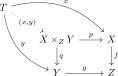

In [26]:
src = raw"""
\documentclass[tikz]{standalone}
\usepackage{tikz-cd}
\usetikzlibrary{cd}

\begin{document}
\begin{tikzcd}
T
\arrow[drr, bend left, "x"]
\arrow[ddr, bend right, "y"]
\arrow[dr, dotted, "{(x,y)}" description] & & \\
& X \times_Z Y \arrow[r, "p"] \arrow[d, "q"]
& X \arrow[d, "f"] \\
& Y \arrow[r, "g"]
& Z
\end{tikzcd}
\end{document}
"""

cmds = itikz.build_commands_dict(use_xetex=false,use_dvi=false,crop=false)
itikz.fetch_or_compile_svg(src, prefix="cd_", working_dir="/tmp/itikz", full_err=false, debug=false,
                            tex_program=cmds["tex_program"], svg_converter=cmds["svg_converter"],svg_crop=cmds["svg_crop"])

# Linear Algebra Examples

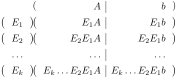

In [4]:
mat_rep = raw"""
      &&                   A &                    b \\  \noalign{\vskip1.5mm}
E_1   &&               E_1 A &                E_1 b \\  \noalign{\vskip1.5mm}
E_2   &&           E_2 E_1 A &            E_2 E_1 b \\  \noalign{\vskip1.5mm}
\dots && \dots               & \dots                \\  \noalign{\vskip1.5mm}
E_k   && E_k \dots E_2 E_1 A &  E_k \dots E_2 E_1 b
"""
submatrix_locs=["{1-3}{1-4}","{2-3}{2-4}","{3-3}{3-4}","{5-3}{5-4}",
                "{2-1}{2-1}","{3-1}{3-1}","{5-1}{5-1}"
               ]
pivot_locs    = []
txt_with_locs = []
mat_format    = "{ccrIr}"

cmds = itikz.build_commands_dict(use_xetex=true,use_dvi=false,crop=true)
itikz.fetch_or_compile_svg( jinja.Template( nM.GE_TEMPLATE ).render( preamble=nM.preamble, extension=nM.extension,
                                                                      mat_rep=mat_rep, mat_format=mat_format, submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
                            prefix="test_", working_dir="/tmp/itikz", debug=false,
                            keep_file="/tmp/itikz/foo",
                            tex_program=cmds["tex_program"], svg_converter=cmds["svg_converter"],svg_crop=cmds["svg_crop"], nexec=1 )

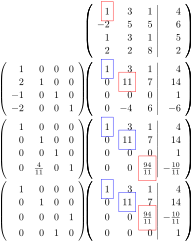

In [29]:
using LinearAlgebra, Latexify
function to_latex_str(x)
    if x < 0
        replace( "-"*latexify(-x), "\$"=>"")
    else
        replace( latexify(x), "\$"=>"")
    end
end

# Look at the following matrix
A  = [ 1 3 1 4;  -2 5 5 6;  1 3 1 5;   2 2 8 2     ];               p1 = (1,1)
E1 = [ 1 0 0 0;  2 1 0 0;  -1 0 1 0;  -2 0 0 1     ]; A1 = E1 * A;  p2 = (2,2)
E2 = [ 1 0 0 0;  0 1 0 0;   0 0 1 0;   0 4//11 0 1 ]; A2 = E2 * A1; p3 = (4,3)
E3 = [ 1 0 0 0;  0 1 0 0;   0 0 0 1;   0 0 1 0     ]; A3 = E3 * A2

matrices = [[ :none, to_latex_str.( A    )],
                     to_latex_str.([E1 A1]),
                     to_latex_str.([E2 A2]),
                     to_latex_str.([E3 A3]) ]

 mat_rep, submatrix_locs, pivot_locs, path_corners, txt_with_locs,mat_format=nM.ge_layout_from_stacked(matrices,
        pivots=[p1,p2,p3], txt=[], Nrhs=1);
pivot_locs[end]=("(15-7)","red") # <=============================== HACK: need to account for row exchanges...

cmds = itikz.build_commands_dict(use_xetex=true,use_dvi=false,crop=true)
h=itikz.fetch_or_compile_svg( jinja.Template( nM.GE_TEMPLATE ).render(
        preamble=nM.preamble*raw"\NiceMatrixOptions{cell-space-top-limit = 3pt,cell-space-bottom-limit = 3pt}",
        extension=nM.extension,
        mat_rep=mat_rep,
        mat_format=mat_format,
        submatrix_locs=submatrix_locs, pivot_locs=pivot_locs, txt_with_locs=txt_with_locs),
        prefix="test_",
        working_dir="/tmp/itikz",
        debug=false,
        keep_file="/tmp/itikz/foo",
        tex_program=cmds["tex_program"], svg_converter=cmds["svg_converter"],svg_crop=cmds["svg_crop"], nexec=4 );
h

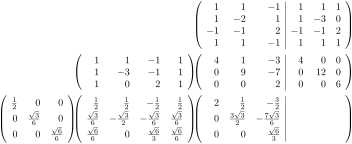

In [22]:
A = [ 1  1 -1
      1 -2  1
     -1 -1  2
      1  1 -1]
W = [ 1  1  1
      1 -3  0
     -1 -1  2
      1  1  1]

qr_mat_rep, qr_mat_fmt, qr_submatrix_locs  = nM.qr_layout(A,W)

cmds = itikz.build_commands_dict(use_xetex=true,use_dvi=false,crop=true)
h = itikz.fetch_or_compile_svg( jinja.Template( nM.GE_TEMPLATE ).render(
        preamble=nM.preamble*raw"\NiceMatrixOptions{cell-space-top-limit = 1pt,cell-space-bottom-limit = 1pt}",
        extension=nM.extension,
        mat_rep=qr_mat_rep,
        mat_format=qr_mat_fmt,
        submatrix_locs=qr_submatrix_locs,# pivot_locs=pivot_locs, txt_with_locs=txt_with_locs
        ),
        prefix="test_",
        working_dir="/tmp/itikz",
        debug=false,
        keep_file="/tmp/itikz/foo__",
        tex_program=cmds["tex_program"], svg_converter=cmds["svg_converter"],svg_crop=cmds["svg_crop"], nexec=4 );
h